# 4- Estadística descriptiva & As-Is de los datos

# 1 Importación de librerias

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 2 Lectura de mi base de datos

In [29]:
Telecom = pd.read_csv(r'C:\Users\Lucia\Desktop\bootcamp\Proyecto_EDA_Pablo_Mendez\telecom.csv')


# 3 Detalle & Entendimiento de las columnas


In [30]:
Telecom.head(0)

,CALL ID,AGENT,DATE,DAY_OF_THE_WEEK,TIME,TOPIC,ANSWERED (Y/N),RESOLVED,SPEED OF ANSWER IN SECONDS,AVGTALKDURATION,SATISFACTION RATING




| Columnas                  | Descripción                                                 |
|:---------------------------:|-------------------------------------------------------------|
| *1*                         | **CALL ID** - *ID único de las llamadas*                           |
| *2*                         | **AGENT** - *Nombre del agente que participa en la interacción*  |
| *3*                         | **DATE** - *Fecha de la interacción con el cliente*               |
| *4*                         | **DAY_OF_THE_WEEK** - *Día de la semana de la interacción*        |
| *5*                         | **TIME** - *Hora de inicio de la interacción*                      |
| *6*                         | **TOPIC** - *Motivo principal de la interacción*                  |
| *7*                         | **ANSWERED(Y/N)** - *Indica si la llamada se concreta o no*       |
| *8*                         | **RESOLVED** - *Indica si la gestión/consulta fue resuelta*        |
| *9*                         | **SPEED OF ANSWER IN SECONDS** - *Tiempo de demora del cliente*    |
| *10*                        | **AVGTALKDURATION** - *Duración de la interacción*                |
| *11*                        | **SATISFACTION RATING** - *CSAT (Customer Satisfaction)*          |

# 4 Analisis preliminar 

In [78]:
Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CALL ID                     5000 non-null   object
 1   AGENT                       5000 non-null   object
 2   DATE                        5000 non-null   object
 3   DAY_OF_THE_WEEK             5000 non-null   object
 4   TIME                        5000 non-null   object
 5   TOPIC                       5000 non-null   object
 6   ANSWERED (Y/N)              5000 non-null   object
 7   RESOLVED                    5000 non-null   object
 8   SPEED OF ANSWER IN SECONDS  5000 non-null   object
 9   AVGTALKDURATION             5000 non-null   object
 10  SATISFACTION RATING         5000 non-null   object
dtypes: object(11)
memory usage: 429.8+ KB


#### *Disponemos de 5000 datos sin nulos con un total de 11 columnas*

In [32]:
Telecom.describe()

,CALL ID,AGENT,DATE,DAY_OF_THE_WEEK,TIME,TOPIC,ANSWERED (Y/N),RESOLVED,SPEED OF ANSWER IN SECONDS,AVGTALKDURATION,SATISFACTION RATING
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,5000,8,90,7,375,5,2,2,117,392,6
top,ID0033,Jim,2021-01-11,Monday,11:55:41,Streaming,Y,Y,,0 days 00:00:00,3.0
freq,1,666,84,770,30,1022,4054,3646,946,946,1218


#### *Calculamos la moda, la media y la mediana de los datos disponibles en Telecom*

In [79]:
def datos_estadisticos(Telecom):
    try:

        columnas_numericas = Telecom.select_dtypes(include=['object'])
        detalle = {}
        for columna_numericas in Telecom.columns:
            datos_estadisticos = Telecom[columna_numericas].agg(['mean', 'mode', 'median'])
            detalle[columna_numericas] = datos_estadisticos
        return detalle 
    except Exception as e:
        print(f"error: {str(e)}")
        return None 

detalle_de_datos_estadisticos = datos_estadisticos(Telecom)
detalle_de_datos_estadisticos

error: Could not convert string 'ID0033ID0056ID0039ID0009ID0043ID0030ID0022ID0014ID0017ID0016ID0024ID0021ID0045ID0031ID0042ID0025ID0002ID0027ID0015ID0007ID0049ID0013ID0058ID0044ID0057ID0028ID0054ID0040ID0020ID0001ID0047ID0003ID0029ID0041ID0032ID0034ID0035ID0055ID0053ID0037ID0010ID0005ID0008ID0004ID0038ID0012ID0006ID0011ID0018ID0019ID0023ID0026ID0036ID0046ID0048ID0050ID0051ID0052ID0082ID0063ID0077ID0099ID0104ID0065ID0064ID0078ID0061ID0112ID0113ID0059ID0084ID0072ID0067ID0115ID0091ID0102ID0118ID0100ID0106ID0074ID0080ID0069ID0083ID0086ID0060ID0085ID0103ID0096ID0089ID0079ID0105ID0068ID0093ID0110ID0108ID0073ID0071ID0081ID0097ID0075ID0095ID0092ID0088ID0066ID0111ID0094ID0062ID0070ID0076ID0087ID0090ID0098ID0101ID0107ID0109ID0114ID0116ID0117ID0153ID0139ID0170ID0154ID0151ID0175ID0136ID0129ID0132ID0126ID0160ID0171ID0169ID0128ID0176ID0156ID0149ID0158ID0155ID0130ID0145ID0122ID0124ID0164ID0137ID0144ID0127ID0142ID0163ID0119ID0143ID0135ID0161ID0174ID0140ID0141ID0162ID0147ID0168ID0159ID0123ID0121ID0131I

In [61]:
def calcular_estadisticas(Telecom):
    info = Telecom.agg(['mean', 'mode', 'median']).transpose()
    info.columns = ['Promedio', 'Moda', 'Mediana']
    return info


In [64]:
data = {
    'Columna1': [1, 2, 3, 4, 5],
    'Columna2': [10, 20, 30, 40, 50],
    'Columna3': [5, 5, 10, 10, 15]
}

df = pd.DataFrame(data)

# Calcular estadísticas
resultados = calcular_estadisticas(df)

# Mostrar el resultado
print(resultados)

ValueError: cannot combine transform and aggregation operations

In [33]:
Telecom.isna().sum()

CALL ID                       0
AGENT                         0
DATE                          0
DAY_OF_THE_WEEK               0
TIME                          0
TOPIC                         0
ANSWERED (Y/N)                0
RESOLVED                      0
SPEED OF ANSWER IN SECONDS    0
AVGTALKDURATION               0
SATISFACTION RATING           0
dtype: int64

#### *No se verifican nulos en la base de datos*

In [34]:
Telecom['TOPIC'].value_counts()

TOPIC
Streaming            1022
Technical Support    1019
Payment related      1007
Contract related      976
Admin Support         976
Name: count, dtype: int64

In [35]:
Porcentaje = (((Telecom['TOPIC'].value_counts())/Telecom['CALL ID'].count())*100)
Porcentaje = Porcentaje.apply(lambda x: f"{x:.2f}%")
Porcentaje

TOPIC
Streaming            20.44%
Technical Support    20.38%
Payment related      20.14%
Contract related     19.52%
Admin Support        19.52%
Name: count, dtype: object

#### *Podriamos decir que existe una distrubución con tendencia uniforma dado que no existe un topico preponderante*

C:\Users\Lucia\AppData\Local\Temp\ipykernel_25328\384944852.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Telecom['TOPIC'].value_counts().index, y=Telecom['TOPIC'].value_counts(), palette='viridis')


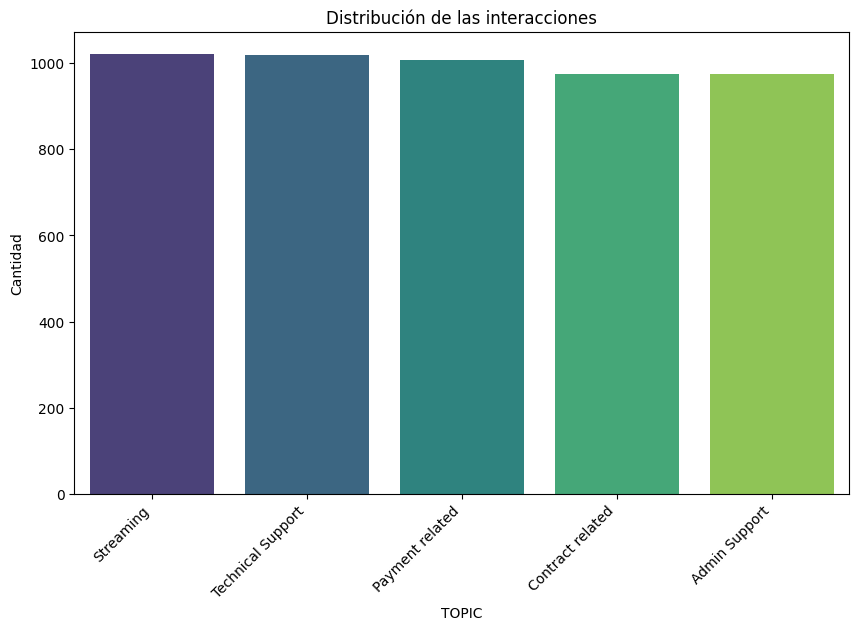

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x=Telecom['TOPIC'].value_counts().index, y=Telecom['TOPIC'].value_counts(), palette='viridis')


plt.xlabel('TOPIC')
plt.ylabel('Cantidad')
plt.title('Distribución de las interacciones')



#ax.spines['top'].set_visible(False)?
#ax.spines['right'].set_visible(False)?

plt.xticks(rotation=45, ha='right')


plt.show()

#### *En el grafico corroboramos que la distribución es bastante uniforme respecto del total de interacciones*

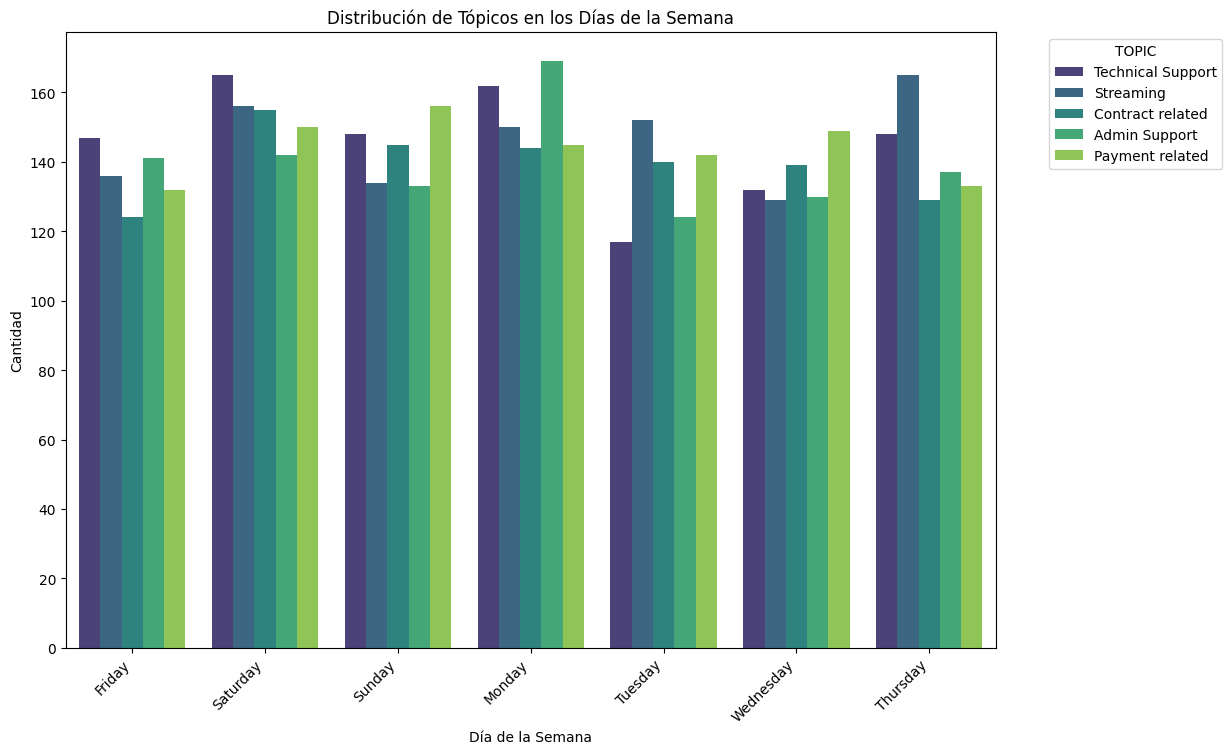

In [57]:
plt.figure(figsize=(12, 8))
sns.countplot(x='DAY_OF_THE_WEEK', hue='TOPIC', data=Telecom, palette='viridis')

plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad')
plt.title('Distribución de Tópicos en los Días de la Semana')
plt.xticks(rotation=45, ha='right')
plt.legend(title='TOPIC', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [58]:
Telecom

,CALL ID,AGENT,DATE,DAY_OF_THE_WEEK,TIME,TOPIC,ANSWERED (Y/N),RESOLVED,SPEED OF ANSWER IN SECONDS,AVGTALKDURATION,SATISFACTION RATING
0,ID0033,Diane,2021-01-01,Friday,13:33:36,Technical Support,Y,Y,57.0,0 days 00:06:49,3.0
1,ID0056,Dan,2021-01-01,Friday,17:44:10,Streaming,Y,Y,83.0,0 days 00:06:45,4.0
2,ID0039,Stewart,2021-01-01,Friday,14:38:24,Contract related,Y,Y,74.0,0 days 00:06:41,1.0
3,ID0009,Greg,2021-01-01,Friday,11:13:55,Admin Support,Y,Y,15.0,0 days 00:06:38,4.0
4,ID0043,Diane,2021-01-01,Friday,14:47:02,Technical Support,Y,Y,45.0,0 days 00:06:21,3.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,ID4992,Joe,2021-03-31,Wednesday,14:13:55,Streaming,N,N,,0 days 00:00:00,
4996,ID4993,Joe,2021-03-31,Wednesday,14:18:14,Admin Support,N,N,,0 days 00:00:00,
4997,ID4994,Greg,2021-03-31,Wednesday,14:58:34,Contract related,N,N,,0 days 00:00:00,
4998,ID4995,Dan,2021-03-31,Wednesday,15:33:07,Payment related,N,N,,0 days 00:00:00,


In [97]:
pd.pivot_table(Telecom, values='CALL ID', index='AGENT', aggfunc='count', sort=True).sort_values(by='CALL ID')

,CALL ID
AGENT,
Stewart,582
Joe,593
Greg,624
Becky,631
Dan,633
Diane,633
Martha,638
Jim,666


In [90]:
distribucion_por_agente = pd.pivot_table(Telecom, values='CALL ID', index='AGENT',columns='DATE', aggfunc='count', fill_value=0)
distribucion_por_agente



DATE,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,...,2021-03-22,2021-03-23,2021-03-24,2021-03-25,2021-03-26,2021-03-27,2021-03-28,2021-03-29,2021-03-30,2021-03-31
AGENT,,,,,,,,,,,,,,,,,,,,,
Becky,8,9,5,5,5,3,7,4,7,8,...,6,3,6,4,9,10,4,9,3,3
Dan,6,8,9,4,7,5,7,9,14,7,...,7,9,9,3,8,8,7,6,4,2
Diane,8,11,6,5,8,4,7,10,5,8,...,8,5,5,2,8,3,5,6,4,4
Greg,6,4,5,4,10,9,8,6,6,8,...,5,6,8,10,5,10,5,3,3,4
Jim,9,7,7,9,2,8,7,5,8,7,...,9,3,8,8,3,6,4,9,5,4
Joe,9,5,12,8,12,6,9,6,11,12,...,7,9,8,3,7,7,6,9,4,3
Martha,6,8,9,13,9,8,4,2,9,7,...,6,9,6,8,7,7,2,9,1,3
Stewart,6,8,5,6,3,15,5,6,8,7,...,6,2,4,8,7,7,5,9,1,4
